### Step 1: Import Required Libraries

This cell imports all the necessary libraries for data loading, preprocessing, clustering, visualization, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load and Preprocess Air Quality Dataset

We read the dataset, remove non-numeric columns (`Date`, `Time`, and unnamed), replace invalid `-200` values, and fill missing data with the median.

In [2]:
df = pd.read_csv("8. AirQualityUCI.csv", sep=';', decimal=',', engine='python')
df.drop(columns=["Unnamed: 15", "Unnamed: 16", "Date", "Time"], inplace=True)
df.replace(-200, np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

### Step 3: Exploratory Data Analysis (EDA)

We inspect the distributions of key features to understand their behavior.

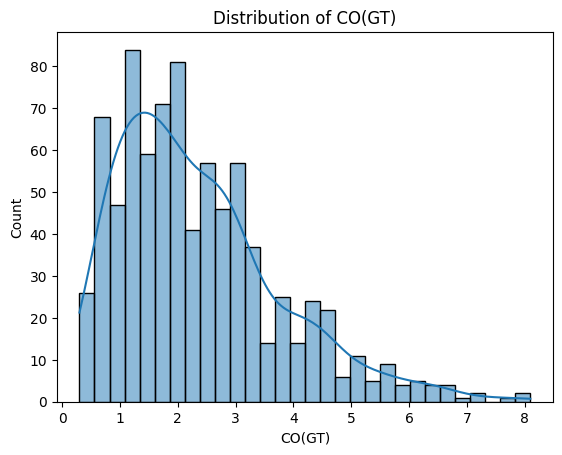

In [3]:
sns.histplot(df['CO(GT)'], kde=True, bins=30)
plt.title('Distribution of CO(GT)')
plt.show()

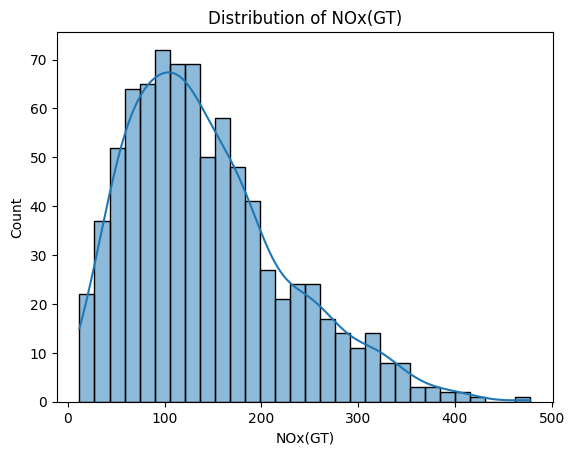

In [4]:
sns.histplot(df['NOx(GT)'], kde=True, bins=30)
plt.title('Distribution of NOx(GT)')
plt.show()

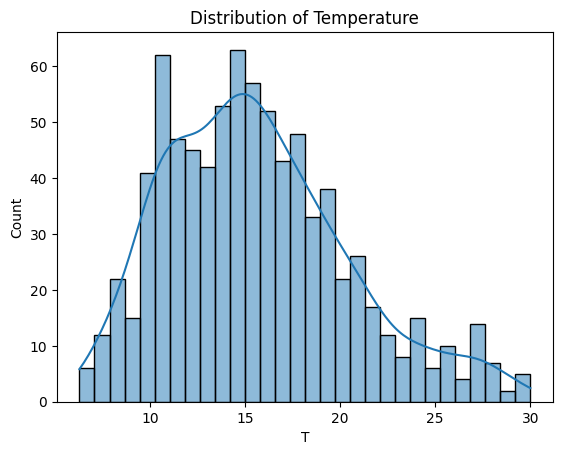

In [5]:
sns.histplot(df['T'], kde=True, bins=30)
plt.title('Distribution of Temperature')
plt.show()

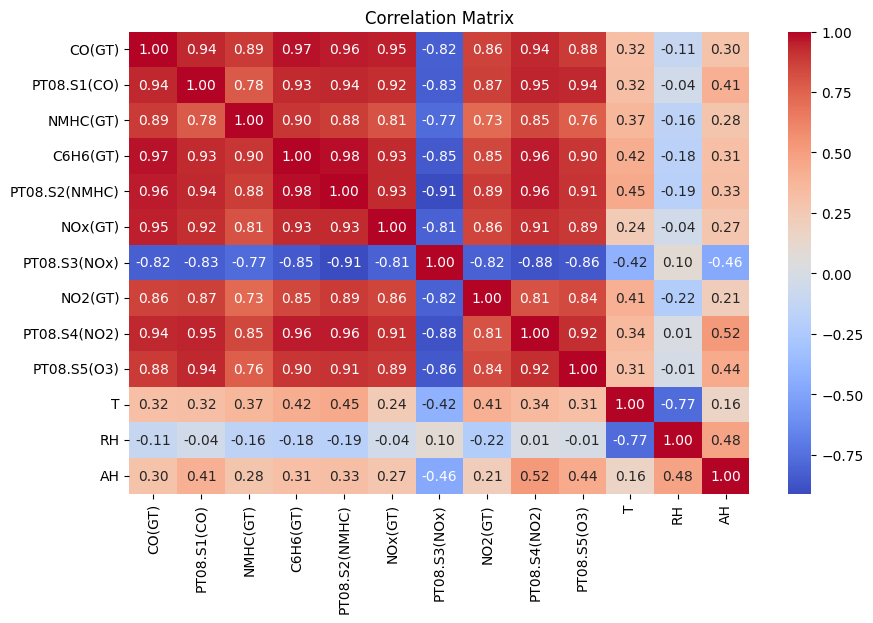

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Step 4: Feature Scaling

We scale features using `StandardScaler` to prepare them for clustering algorithms.

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Step 5: Apply Density-Based Clustering (DBSCAN)

We use `DBSCAN` with `eps=1.8` to find clusters based on density.

In [8]:
dbscan = DBSCAN(eps=1.8, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)
df['DBSCAN_Labels'] = db_labels

### Step 6: Visualize DBSCAN Clusters using PCA

We use PCA to reduce the data to 2D for visualizing clusters formed by DBSCAN.

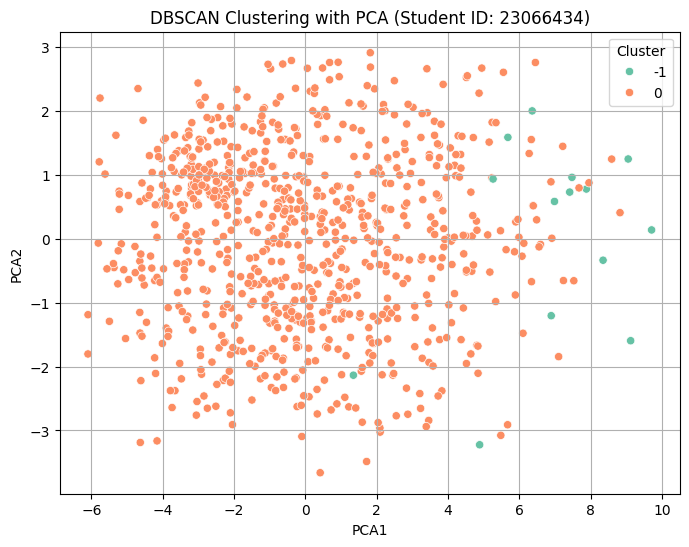

In [9]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Labels', palette='Set2')
plt.title('DBSCAN Clustering with PCA (Student ID: 23066434)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Step 7: DBSCAN Cluster Insights

We calculate how many clusters and noise points DBSCAN detected.

In [10]:
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print(f"Number of clusters found by DBSCAN: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters found by DBSCAN: 1
Number of noise points: 14


### Step 8: Apply K-Means Clustering

We apply `KMeans` with 3 clusters for comparison.

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['KMeans_Labels'] = kmeans_labels

### Step 9: Visualize K-Means Clusters using PCA

Visualize how `KMeans` divided the data in the 2D PCA space.

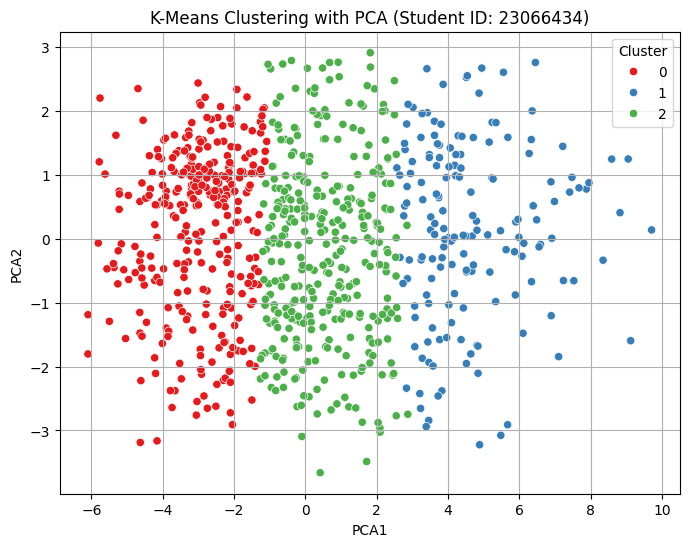

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Labels', palette='Set1')
plt.title('K-Means Clustering with PCA (Student ID: 23066434)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Step 10: Compare Clustering with Silhouette Scores

Silhouette score gives a quantitative measure of cluster cohesion and separation.

In [13]:
dbscan_silhouette = silhouette_score(scaled_data, db_labels) if n_clusters > 1 else -1
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)

print(f"Silhouette Score - DBSCAN: {dbscan_silhouette:.3f}")
print(f"Silhouette Score - K-Means: {kmeans_silhouette:.3f}")

Silhouette Score - DBSCAN: -1.000
Silhouette Score - K-Means: 0.308


### 11 Cluster Size Comparison between DBSCAN and K-Means

This bar chart compares the number of points assigned to each cluster by DBSCAN and K-Means. The DBSCAN method typically identifies a dense core cluster and classifies less dense points as noise (`-1`). In contrast, K-Means partitions the data into a fixed number of clusters (3 in this case), offering a more balanced segmentation. This visualization highlights the difference in clustering philosophy between the two methods.


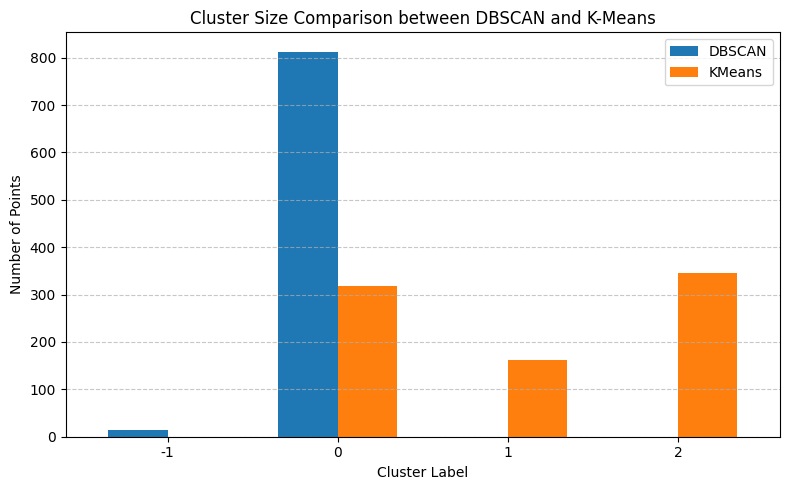

In [16]:
# Prepare cluster size data
dbscan_counts = pd.Series(db_labels).value_counts().sort_index()
kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()

# Convert to DataFrame for easy plotting
cluster_df = pd.DataFrame({
    'DBSCAN': dbscan_counts,
    'KMeans': kmeans_counts
}).fillna(0)

# Plot the comparison
cluster_df.plot(kind='bar', figsize=(8, 5), width=0.7)
plt.title("Cluster Size Comparison between DBSCAN and K-Means")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Final Conclusion

Based on the silhouette scores and cluster structure, we summarize which model performed better.

In [14]:
print("""
From the comparison, K-Means provided clearer clustering structure with a higher silhouette score.
DBSCAN was effective in identifying noise and non-globular clusters but yielded fewer groups.
Thus, K-Means is more suitable for this dataset, while DBSCAN helps uncover outliers.
""")


From the comparison, K-Means provided clearer clustering structure with a higher silhouette score.
DBSCAN was effective in identifying noise and non-globular clusters but yielded fewer groups.
Thus, K-Means is more suitable for this dataset, while DBSCAN helps uncover outliers.

